In [1]:
#Llamamos las paquetrías que necesitaremos
from functools import partial #Funciones de orden superior
from collections import defaultdict #Llama a una función de fábrica para suministrar valores perdidos
import numpy as np
import matplotlib.pyplot as plt # Ploteo
import scipy.integrate #Librería de integración
import sympy 
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #Leyendas personalizadas
%matplotlib inline

In [2]:
#Declaramos dos casos para nuestros parámetros
#Para S1 < 2.4 tendremos un sistema biestable (si dejamos a los demás parámetros en su valor nominal
#Para S1 > 2.42 tendremos un sólo estado estable

scenarios = [{'S1':0, 'S2':1, 'S3':1, 'S4':1, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5},
             {'S1':0.5, 'S2':1, 'S3':1, 'S4':1, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5}]

# Tiempo de integración para las trayectorias
time = np.linspace(0, 1000, 100)

#Declaramos distintas condiciones iniciales:
initial_conditions = [(0,0),(0.4,0.8),(1,1),(1.5,1.6),(2,2),(1.8,3.5),(2.5,3),(3,4),(4,7),(4.8,4.3),(5,2),(6,5),(4,6)]
#initial_conditions = [(6,5),,(13,11),(15,18),(3,13),(5,6),(9,2),(7.8,15),(1,7.8),(0,8.5)]

In [3]:
def Cloutier(y, t, S1, S2, S3, S4, K1, K2, K3, K4, daSYN, kaSYN):
    """ Definimos el modelo de Cloutier
    Argumentos:
        y (array): (concentraciónn de ROS, concentración de aSYNmis)
        t (float): tiempo 
        S1(float): Estrés oxidativo interno y externo
        S2(float): Mecanismo antioxidativo
        S3(float): Daños y mutaciones genéticas
        S4(float): Degradación de proteínas
    Regresa: dy/dt
    """
    ROS, aSYNmis = y
    return np.array([(K1*(1+S1+daSYN*((aSYNmis/kaSYN)**4)/(1+(aSYNmis/kaSYN)**4))-K2*ROS*S2)/10**3,
                     K3*ROS*S3-K4*aSYNmis*S4])

In [4]:
# Simulamos las trayectorias para ROS y aSYNmis del modelo de Cloutier
trajectory = {}
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        trajectory[i,j] = scipy.integrate.odeint(partial(Cloutier, **param),
                                                 y0=ic,
                                                 t=time)

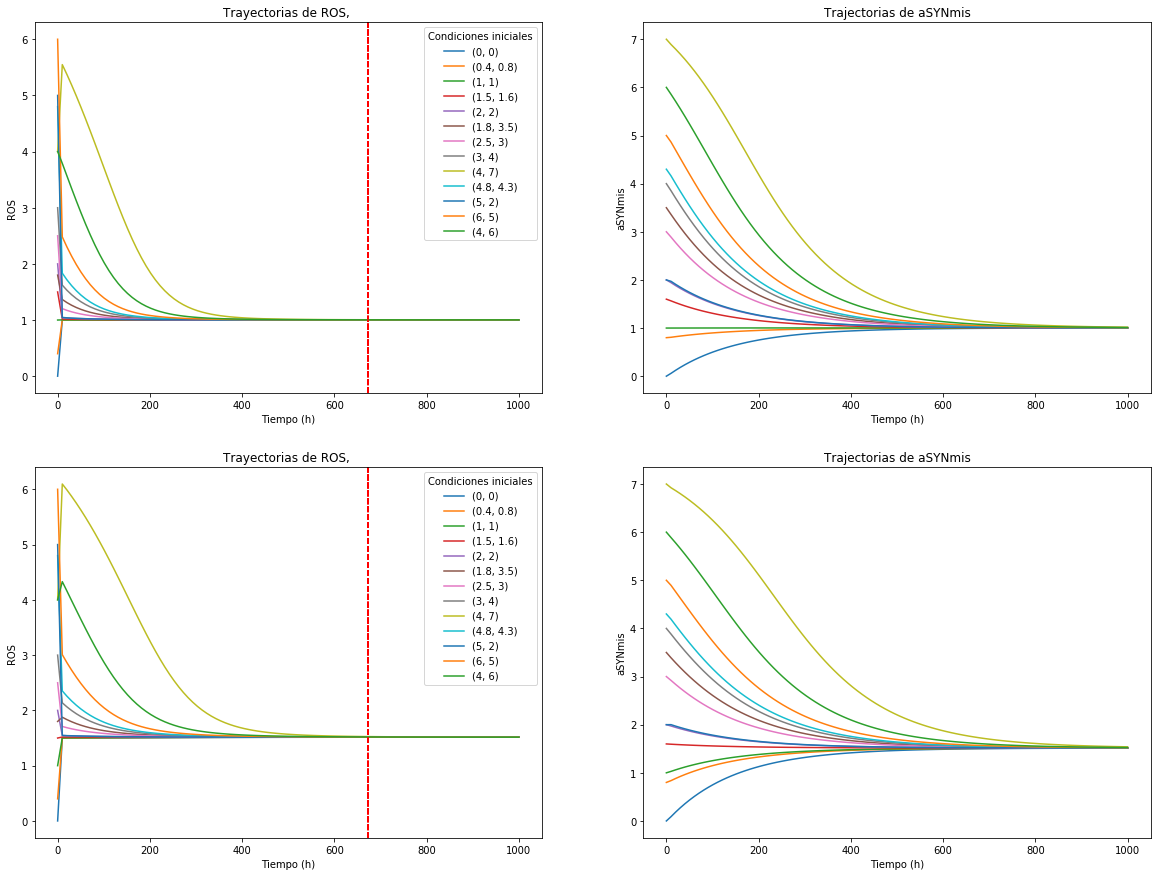

In [5]:
# Dibujamos las trayectorias simuladas de arriba 
fig, ax = plt.subplots(2,2,figsize=(20,15))
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        ax[i][0].set(xlabel='Tiempo (h)', ylabel='ROS', title='Trayectorias de ROS, ')
        ax[i][1].set(xlabel='Tiempo (h)', ylabel='aSYNmis', title='Trajectorias de aSYNmis')
        l = ax[i][0].plot(time,trajectory[i,j][:,0], label=ic)
        ax[i][1].plot(time,trajectory[i,j][:,1], color=l[0].get_color())
        ax[i][0].axvline(x=672, color = "red", linestyle = "dashed")
    ax[i][0].legend(title='Condiciones iniciales')